# **Predicting Molecular Solubility Using Machine Learning Models and SHAP Interpretability**

## **Imports**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import shap

## **Loading the Data**

In [ ]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **Data Preparation**

In [ ]:
x = df.drop('logS', axis=1)
y = df['logS']

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


## **Splitting of data into train set and test set**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=100)


,logS
822,-3.380
118,-8.010
347,-2.160
1123,-1.170
924,-0.730
...,...
1114,-4.130
427,-9.018
711,-0.600
4,-3.040


# **Building of models**

## **Linear Regression**

In [ ]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ylr_tr_pred = lr.predict(xtrain)
ylr_te_pred = lr.predict(xtest)

## **Random Forest**

In [ ]:
rf = RandomForestRegressor(max_depth=5,random_state=100)
rf.fit(xtrain,ytrain)
yrf_tr_pred = rf.predict(xtrain)
yrf_te_pred = rf.predict(xtest)

## **K-Nearest Neighbour Algorithm (KNN)**

In [ ]:
def knn_pred(xtrain,ytrain,xtest,k=5):
    y_pred = []
    xtrain_np = xtrain.values
    xtest_np = xtest.values
    ytrain_np = ytrain.values
    for test_point in xtest_np:
        distances = np.sqrt(np.sum((xtrain_np - test_point)**2,axis=1))
        knn_indices = distances.argsort()[:k]
        pred = np.mean(ytrain_np[knn_indices])
        y_pred.append(pred)
    return np.array(y_pred)

In [ ]:
yknn_tr_pred = knn_pred(xtrain,ytrain,xtrain,k=5)
yknn_te_pred = knn_pred(xtrain,ytrain,xtest,k=5)

# **Evaluation metrics**

In [ ]:
def mape(ytrue,ypred):
    ape = []
    for actual,predicted in zip(ytrue,ypred):
        if actual!=0:
            ape.append(abs((actual-predicted)/actual))
    return np.mean(ape)*100

## **Linear Regression**

In [ ]:
lr_tr_mae = mean_absolute_error(ytrain,ylr_tr_pred)
lr_tr_rmse = np.sqrt(mean_squared_error(ytrain,ylr_tr_pred))
lr_tr_mape = mape(ytrain,ylr_tr_pred)

np.float64(97.93285722027426)

In [ ]:
lr_te_mae = mean_absolute_error(ytest,ylr_te_pred)
lr_te_rmse = np.sqrt(mean_squared_error(ytest,ylr_te_pred))
lr_te_mape = mape(ytest,ylr_te_pred)

np.float64(68.66404898094135)

## **Random Forest**

In [ ]:
rf_tr_mae = mean_absolute_error(ytrain,yrf_tr_pred)
rf_tr_rmse = np.sqrt(mean_squared_error(ytrain,yrf_tr_pred))
rf_tr_mape = mape(ytrain,yrf_tr_pred)

np.float64(70.59337066513947)

In [ ]:
rf_te_mae = mean_absolute_error(ytest,yrf_te_pred)
rf_te_rmse = np.sqrt(mean_squared_error(ytest,yrf_te_pred))
rf_te_mape = mape(ytest,yrf_te_pred)


np.float64(48.50878237687259)

## **KNN**

In [ ]:
knn_tr_mae = mean_absolute_error(ytrain,yknn_tr_pred)
knn_tr_rmse = np.sqrt(mean_squared_error(ytrain,yknn_tr_pred))
knn_tr_mape = mape(ytrain,yknn_tr_pred)


np.float64(94.48215831061042)

In [ ]:
knn_te_mae = mean_absolute_error(ytest,yknn_te_pred)
knn_te_rmse = np.sqrt(mean_squared_error(ytest,yknn_te_pred))
knn_te_mape = mape(ytest,yknn_te_pred)


np.float64(71.8942546157692)

# **Results**

In [ ]:
results_df = pd.DataFrame({
    "Model": ["Linear Regression","Random Forest","Manual KNN"],
    "Train MAE": [lr_tr_mae,rf_tr_mae,knn_tr_mae],
    "Train RMSE": [lr_tr_rmse,rf_tr_rmse,knn_tr_rmse],
    "Train MAPE (in %)": [lr_tr_mape,rf_tr_mape,knn_tr_mape],
    "Test MAE": [lr_te_mae,rf_te_mae,knn_te_mae],
    "Test RMSE": [lr_te_rmse,rf_te_rmse,knn_te_rmse],
    "Test MAPE (in %)": [lr_te_mape,rf_te_mape,knn_te_mape]
})
results_df

,Model,Train MAE,Train RMSE,Train MAPE (in %),Test MAE,Test RMSE,Test MAPE (in %)
0,Linear Regression,0.771699,1.003761,97.932857,0.779830,1.010295,68.664049
1,Random Forest,0.499307,0.648534,70.593371,0.652938,0.869660,48.508782
2,Manual KNN,0.719566,0.996607,94.482158,0.899864,1.250776,71.894255


# **Visualization**

## **Linear Regression**

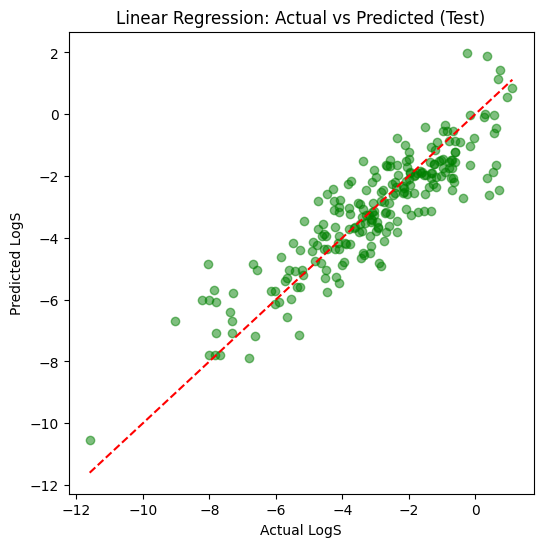

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(ytest,ylr_te_pred,alpha=0.5,color='green')
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],'r--')
plt.xlabel("Actual LogS")
plt.ylabel("Predicted LogS")
plt.title("Linear Regression: Actual vs Predicted (Test)")
plt.show()

## **Random Forest**

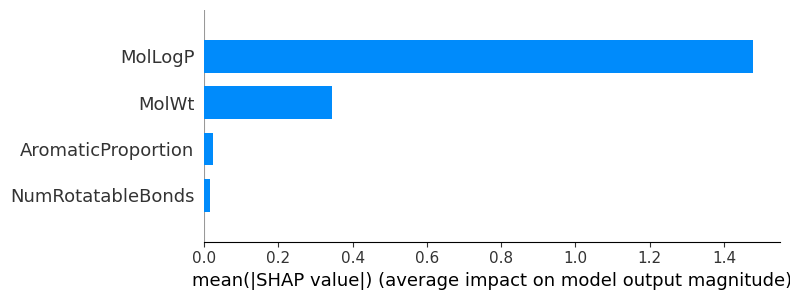

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(xtest)
shap.summary_plot(shap_values,xtest,plot_type="bar")

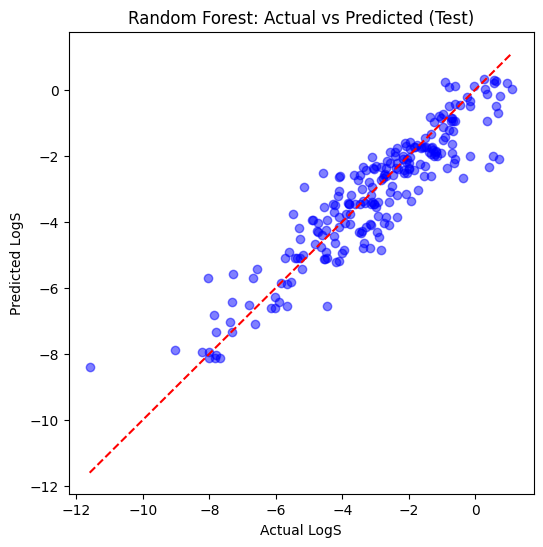

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(ytest,yrf_te_pred,alpha=0.5,color='blue')
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],'r--')
plt.xlabel("Actual LogS")
plt.ylabel("Predicted LogS")
plt.title("Random Forest: Actual vs Predicted (Test)")
plt.show()

## **KNN**

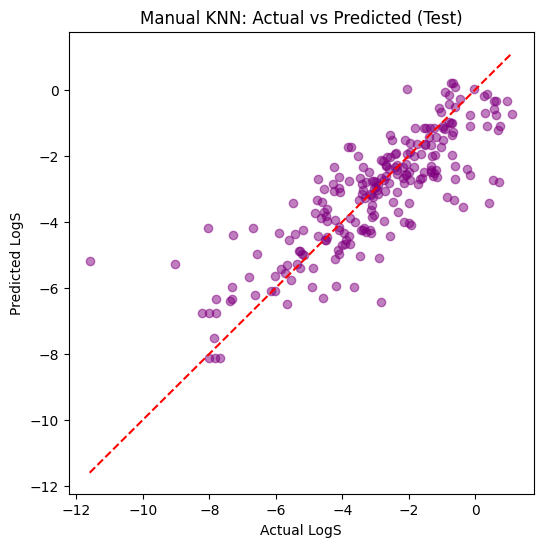

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(ytest, yknn_te_pred,alpha=0.5,color='purple')
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],'r--')
plt.xlabel("Actual LogS")
plt.ylabel("Predicted LogS")
plt.title("Manual KNN: Actual vs Predicted (Test)")
plt.show()